In [1]:
# pwd = "/Users/youtao/code"
pwd = "/scratch/ty296"
hdf5_data_path = '/scratch/ty296/hdf5_data/'
groupname = 'L'
p_fixed_name = 'p_ctrl'
p_fixed_value = 0.4
import os
print(os.getcwd())
import sys
sys.path.append('/scratch/ty296/CT_MPS_mini')
import h5py
import numpy as np

/scratch/ty296


In [2]:
# View singular values from your HDF5 file
filename = os.path.join(pwd, "hdf5_data_combined/sv_combined_p_ctrl0.0.h5")
print(filename)
real_num = 0
with h5py.File(filename, 'r') as f:
    # Get the first key to examine
    first_key = list(f.keys())[real_num]
    print(f"Examining key: {first_key}")
    
    # Get the singular values array
    sv_array = f[first_key][()]
    
    # Display basic info
    print(f"Shape: {sv_array.shape}")
    print(f"Data type: {sv_array.dtype}")
    print(f"Number of singular values: {len(sv_array)}")
    
    # Display the actual values
    print(f"\nSingular values:")
    print(sv_array)
    
    # Display metadata
    print(f"\nMetadata:")
    for attr_name, attr_value in f[first_key].attrs.items():
        print(f"  {attr_name}: {attr_value}")


/scratch/ty296/hdf5_data_combined/sv_combined_p_ctrl0.0.h5
Examining key: real1
Shape: (1,)
Data type: float64
Number of singular values: 1

Singular values:
[1.]

Metadata:
  L: 24
  maxbond: 1
  maxdim: 512
  n_chunk_realizations: 10
  p_ctrl: 0.0
  p_proj: 1.0
  seed: 5204


In [3]:
with h5py.File(filename, 'r') as f:
    L_target = 24
    matching_groups = []
    
    print(f"Searching for groups with L={L_target}...")
    print("=" * 80)
    
    # Loop through all realizations
    for key in f.keys():
        # Check if this group has L=24
        if 'L' in f[key].attrs and f[key].attrs['L'] == L_target:
            matching_groups.append(key)
    
    print(f"Found {len(matching_groups)} groups with L={L_target}")
    print()
    
    # # Display information for each matching group
    # for i, key in enumerate(matching_groups):
    #     sv_array = f[key][()]
    #     attrs = dict(f[key].attrs)
        
    #     print(f"Group {i+1}: {key}")
    #     print(f"  L = {attrs.get('L')}")
    #     print(f"  p_ctrl = {attrs.get('p_ctrl')}")
    #     print(f"  p_proj = {attrs.get('p_proj')}")
    #     print(f"  maxbond = {attrs.get('maxbond')}")
    #     print(f"  Singular value array shape: {sv_array.shape}")
    #     print(f"  Singular values: {sv_array}")
    #     print(f"  Max SV: {np.max(sv_array):.6e}")
    #     print(f"  Min SV: {np.min(sv_array):.6e}")
    #     print(f"  Number of SVs: {len(sv_array)}")
    #     print("-" * 60)


Searching for groups with L=24...
Found 76973 groups with L=24



In [4]:
# Plot singular values for all L=24 groups
L24_groups = []

with h5py.File(filename, 'r') as f:
    L_target = 24
    
    # Collect all L=24 groups
    for key in f.keys():
        if 'L' in f[key].attrs and f[key].attrs['L'] == L_target:
            L24_groups.append(key)


In [5]:
dict_min_sv = {}
for key in L24_groups[:]:
    with h5py.File(filename, 'r') as f:
        # print(f[key].attrs.keys())
        min_sv = min(f[key][()])
        # print(f[key].attrs.keys())
        p_proj = f[key].attrs['p_proj']
        seed = f[key].attrs['seed']
        if p_proj in dict_min_sv:
            dict_min_sv[p_proj].append((np.log10(min_sv), seed))
        else:
            dict_min_sv[p_proj] = [(np.log10(min_sv), seed)]
        # if min_sv < 1e-10:
        #     print(min_sv, p_proj)

        # print(min_sv.shape)


In [6]:
for min_sv, seed in dict_min_sv[0.2]:
    if min_sv < -10:
        print(min_sv, seed)

-10.855633828891428 3414
-12.597906167485522 2021
-10.170566687083745 1013
-13.535744200965304 4339
-14.96617524469853 6220
-13.309174657579211 2430
-11.316727680987318 520
-14.70413645060104 3116
-15.207777271139076 6422
-14.758607025406572 1391
-10.796813423001243 5244
-11.252599614889556 5231
-10.358147654731154 1744
-11.908931816331494 3791
-11.51308646944711 9202
-10.82157676257461 2636
-13.157794405909303 8160
-10.452428155994296 2047
-11.137474312418412 3831
-10.325598924120738 6644
-12.142303274965924 7861
-12.204068143731826 6395
-14.354729374129345 6448
-14.237657583426873 5445
-12.486612303442557 7378
-15.025340153532998 3410
-10.082906149379495 3032
-10.741633882472799 7598
-12.471680117559018 414
-10.039540864569247 9639
-10.295881308077666 7876
-10.203076827396368 2868
-11.722714195533262 2476
-10.662480368285712 5100
-10.381105483130197 6199
-10.517238501603414 6008
-11.108246078976753 1669
-10.926044819826672 7284
-10.615656178855827 4481
-10.795938849252648 3704
-10.53

0 0.2 3810
1 0.24210526315789474 3810
2 0.28421052631578947 3810
3 0.3263157894736842 3810
4 0.3684210526315789 3824
5 0.4105263157894737 3830
6 0.45263157894736844 3830
7 0.49473684210526314 3830


/tmp/ipykernel_54756/446729839.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


8 0.5368421052631579 3830
9 0.5789473684210527 3830
10 0.6210526315789474 3836
11 0.6631578947368421 3840


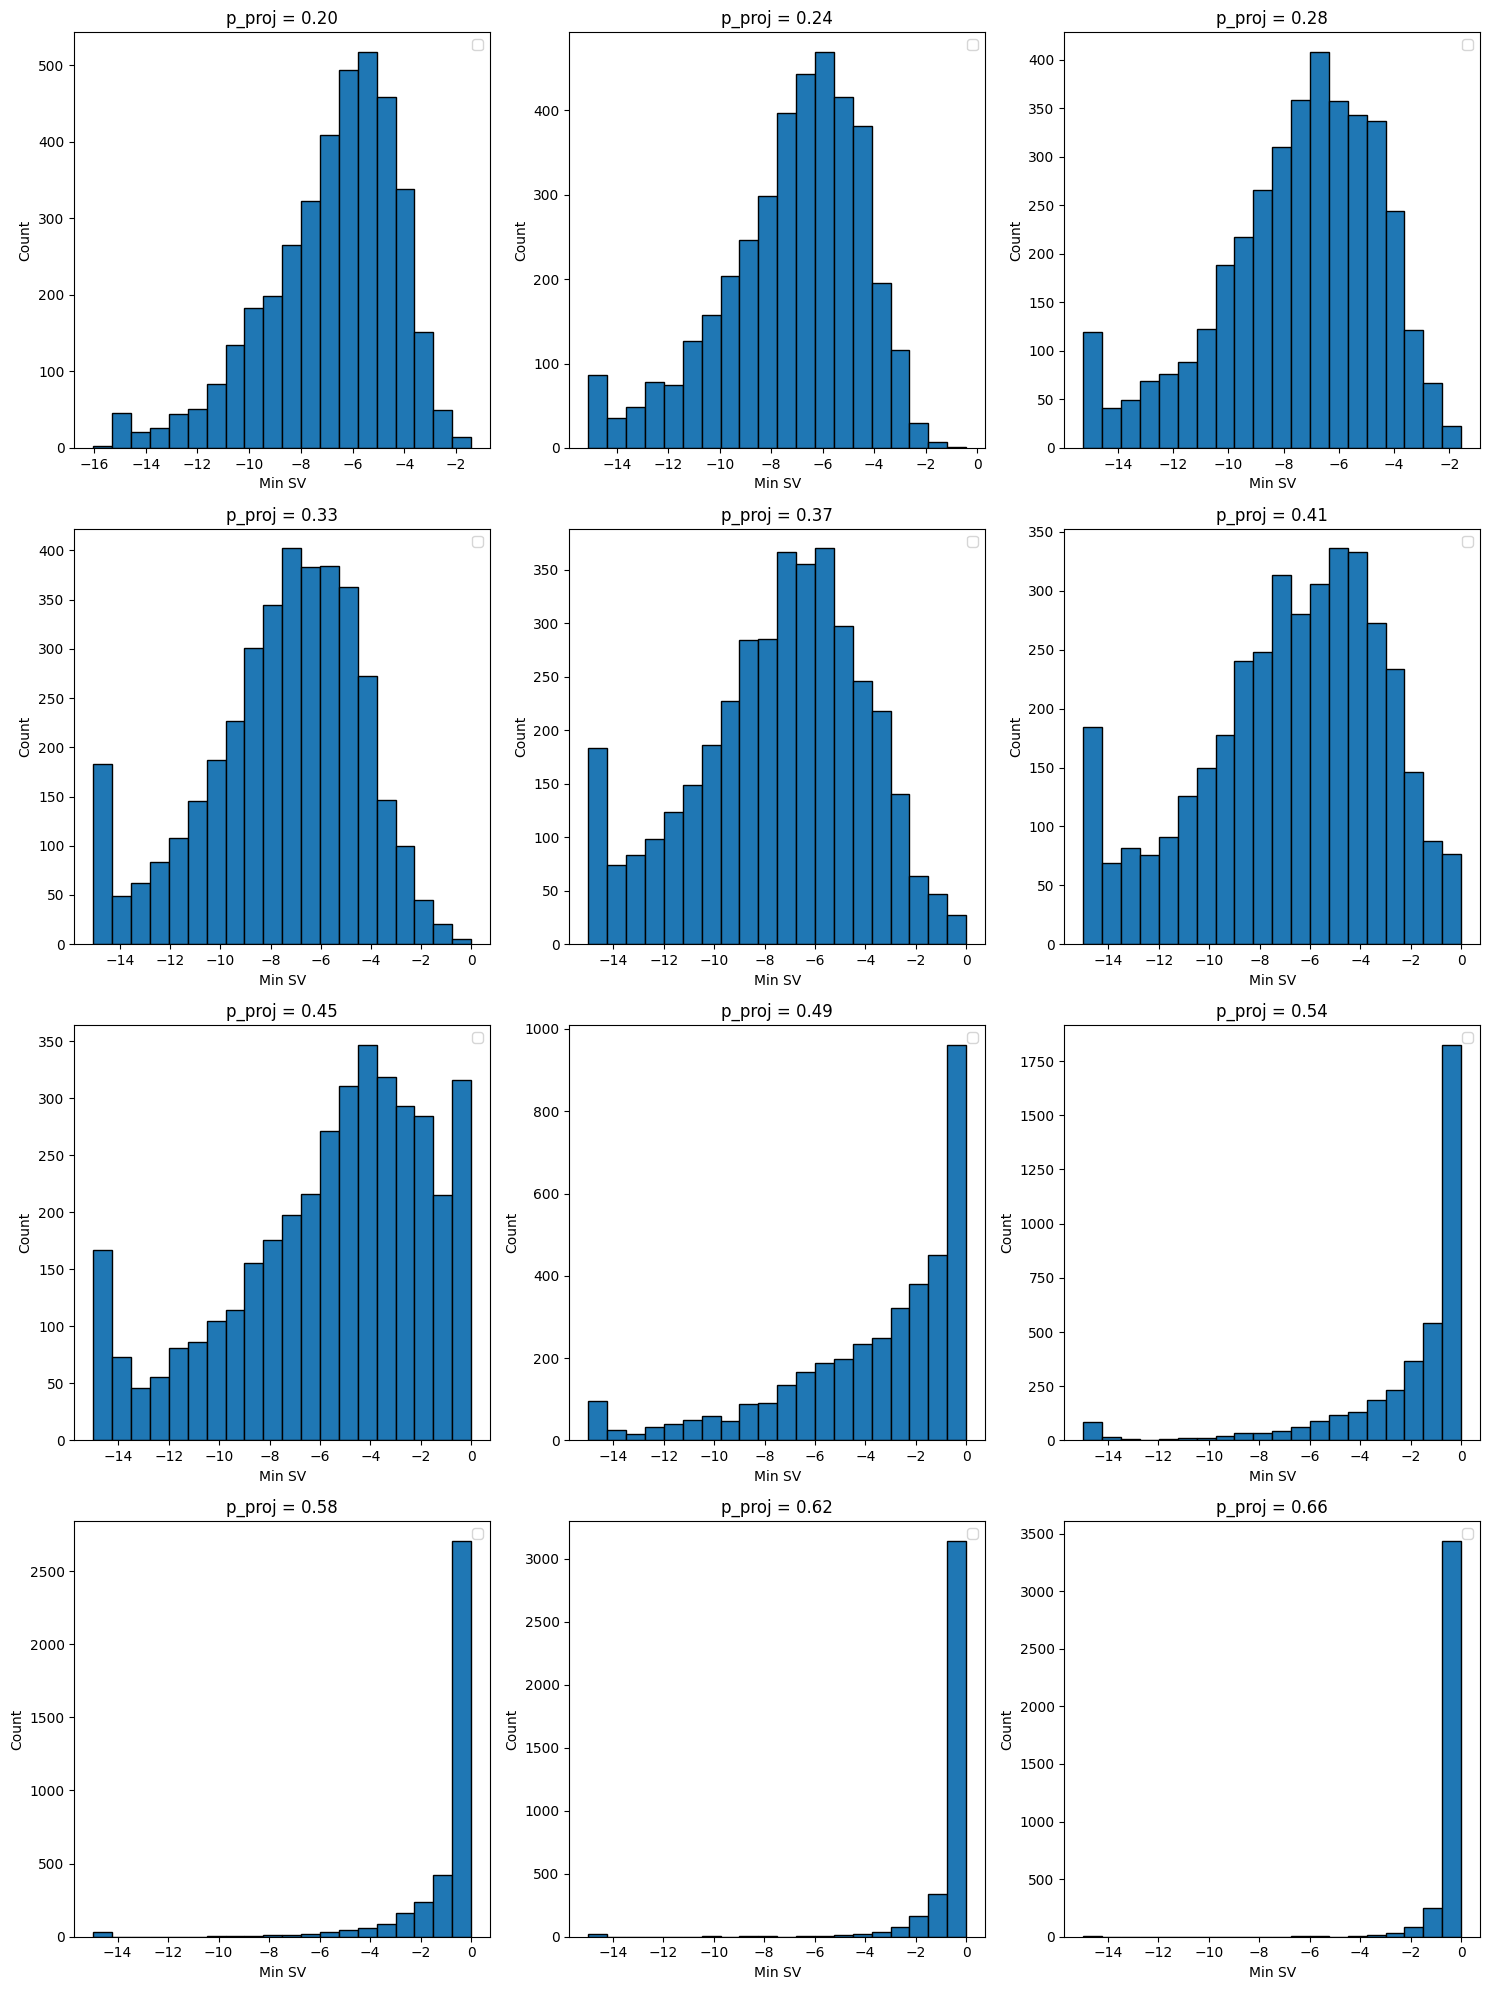

In [14]:
import matplotlib.pyplot as plt
from read_hdf5_func import calculate_variance_and_error, calculate_mean_and_error

# Create a figure with subplots arranged based on number of p_proj values
n_plots = 12
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plot histogram for each p_proj value
for idx, (p_proj, sv_seed_list) in enumerate(sorted(dict_min_sv.items())[0:n_plots]):
    # print(idx, p_proj, sv_seed_list)
    min_svs = [sv for sv, seed in sv_seed_list]
    print(idx, p_proj, len(min_svs))
    ax = axes[idx]
    mean, sem = calculate_mean_and_error(min_svs)
    var, semvar = calculate_variance_and_error(min_svs)
    ax.hist(min_svs, bins=20, edgecolor='black')
    ax.set_title(f'p_proj = {p_proj:.2f}')
    ax.set_xlabel('Min SV')
    ax.set_ylabel('Count')
    # ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.4f}')
    # ax.axvline(mean + var, color='blue', linestyle='--', label=f'Variance: {var:.4f}')
    # ax.axvline(mean - var, color='blue', linestyle='--')
    ax.legend()

# Remove any empty subplots
for idx in range(len(dict_min_sv), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [8]:
from read_hdf5_func import von_neumann_entropy_sv
dict = {}
with h5py.File(filename, 'r') as f:
    for key in L24_groups:
        entropy = von_neumann_entropy_sv(f[key][()], n=0, positivedefinite=False, threshold=1e-15)
        p_proj = f[key].attrs['p_proj']
        if p_proj in dict:
            dict[p_proj].append(entropy)
        else:
            dict[p_proj] = [entropy]
        # print(entropy)
        # print(f[key].attrs['p_proj'])

In [9]:
print(len(dict))

20


3810 0.2
3810 0.24210526315789474
3810 0.28421052631578947
3810 0.3263157894736842
3824 0.3684210526315789
3830 0.4105263157894737
3830 0.45263157894736844
3830 0.49473684210526314
3830 0.5368421052631579
3830 0.5789473684210527
3836 0.6210526315789474
3840 0.6631578947368421
3857 0.7052631578947368
3880 0.7473684210526316
3880 0.7894736842105263
3880 0.8315789473684211
3889 0.8736842105263158
3897 0.9157894736842105
3900 0.9578947368421052
3900 1.0


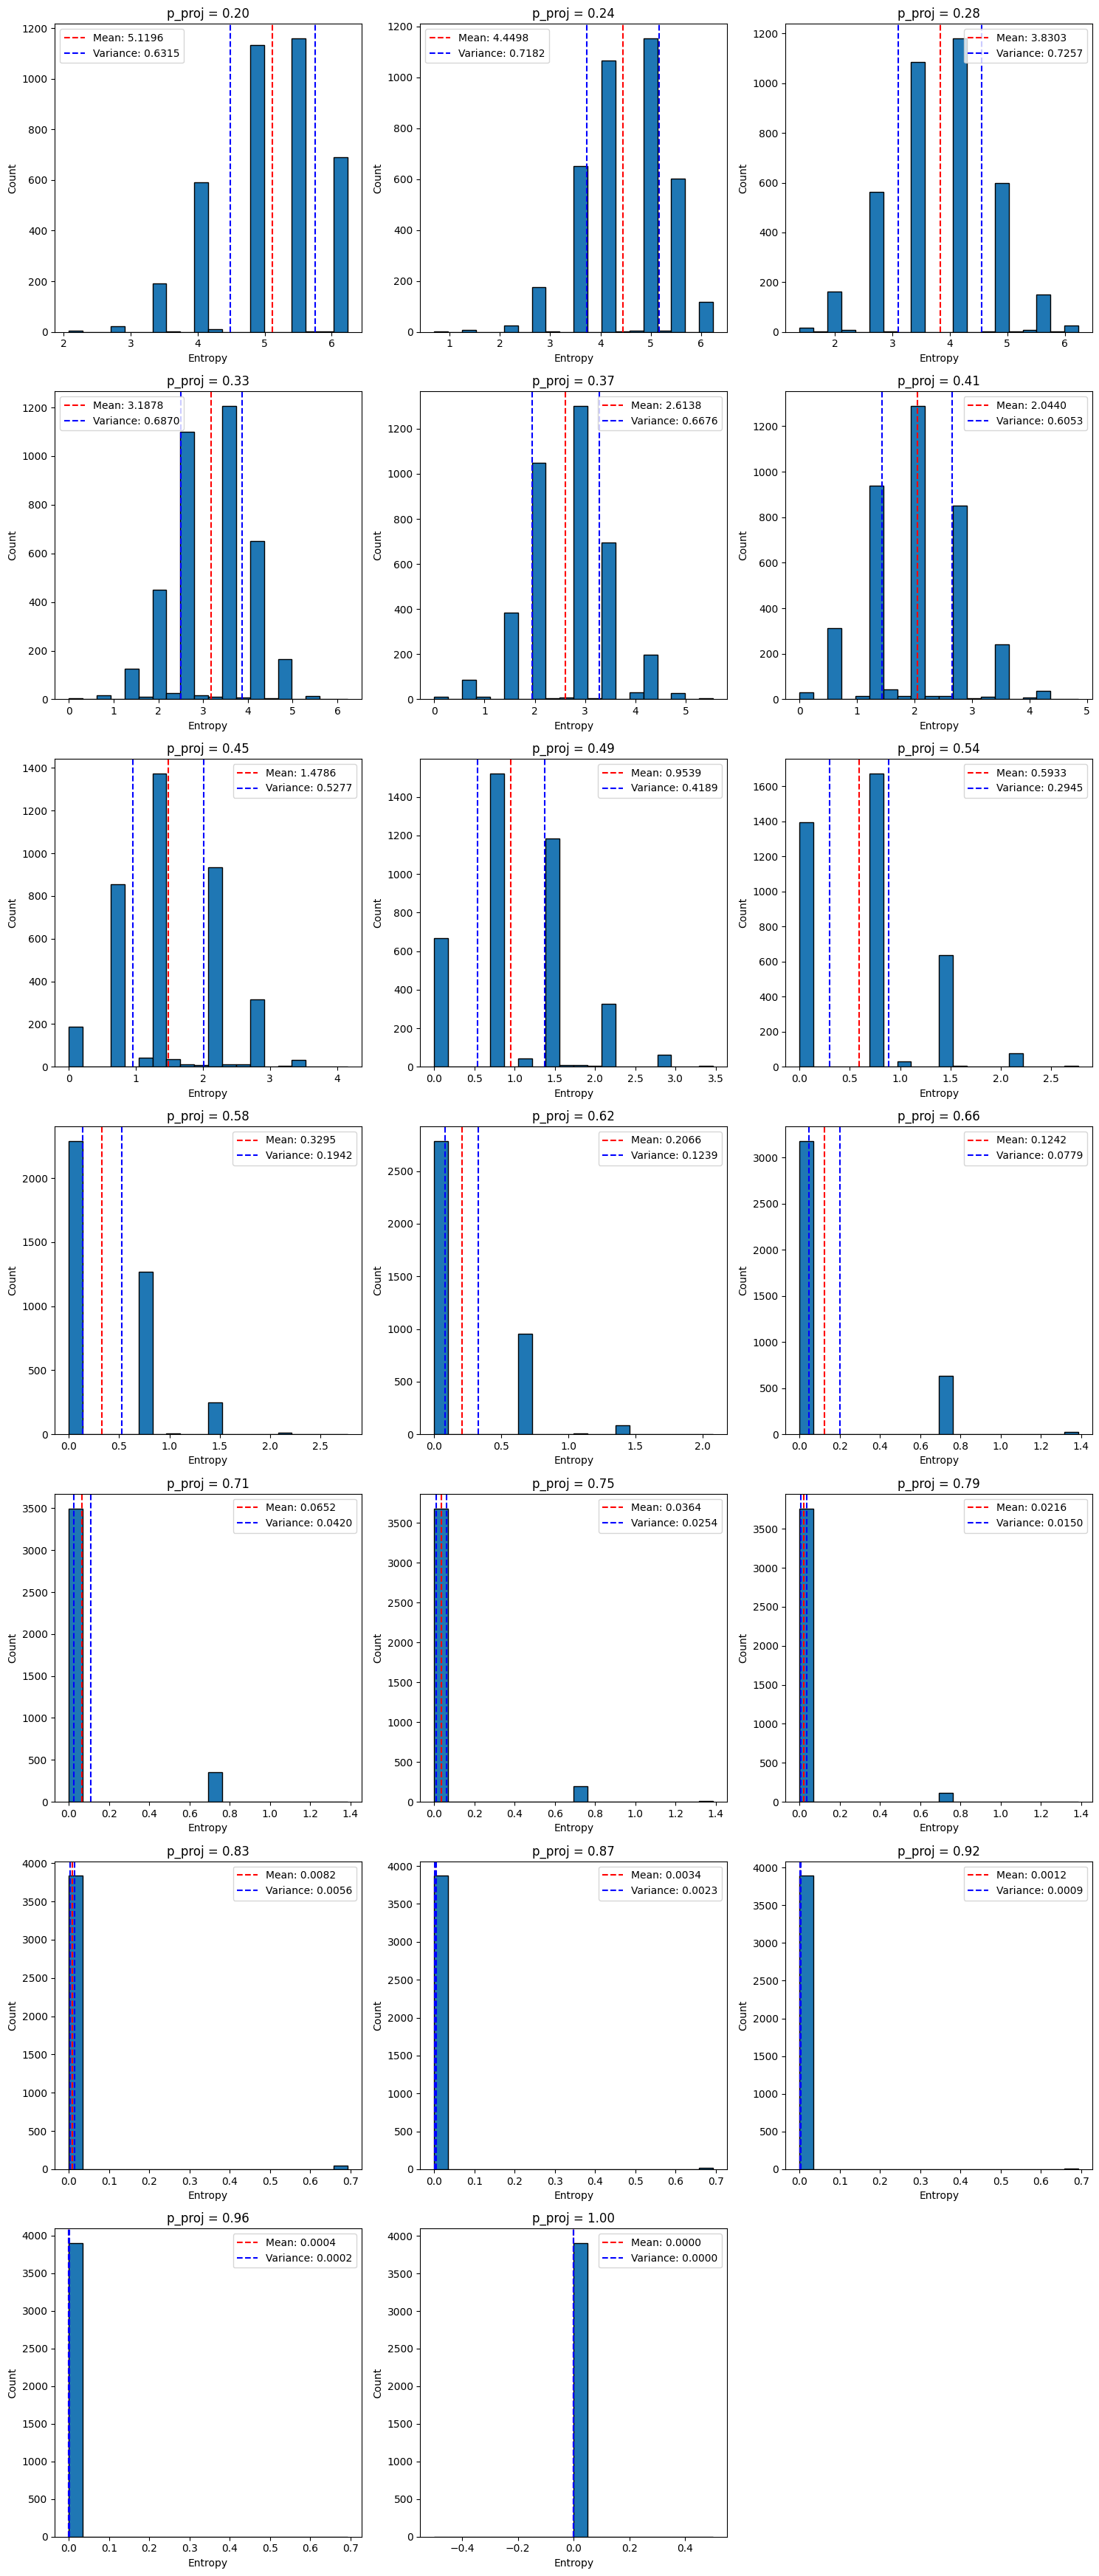

In [10]:
import matplotlib.pyplot as plt
from read_hdf5_func import calculate_variance_and_error, calculate_mean_and_error

# Create a figure with subplots arranged based on number of p_proj values
n_plots = len(dict)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plot histogram for each p_proj value
for idx, (p_proj, entropies) in enumerate(sorted(dict.items())):
    ax = axes[idx]
    mean, sem = calculate_mean_and_error(entropies)
    var, semvar = calculate_variance_and_error(entropies)
    print(len(entropies), p_proj)
    ax.hist(entropies, bins=20, edgecolor='black')
    ax.set_title(f'p_proj = {p_proj:.2f}')
    ax.set_xlabel('Entropy')
    ax.set_ylabel('Count')
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.4f}')
    ax.axvline(mean + var, color='blue', linestyle='--', label=f'Variance: {var:.4f}')
    ax.axvline(mean - var, color='blue', linestyle='--')
    ax.legend()

# Remove any empty subplots
for idx in range(len(dict), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [11]:
dict_maxbond = {}
with h5py.File(filename, 'r') as f:
    for key in L24_groups:
        maxbond = f[key].attrs['maxbond']
        p_proj = f[key].attrs['p_proj']
        if p_proj in dict_maxbond:
            dict_maxbond[p_proj].append(maxbond)
        else:
            dict_maxbond[p_proj] = [maxbond]
        # print(entropy)
        # print(f[key].attrs['p_proj'])

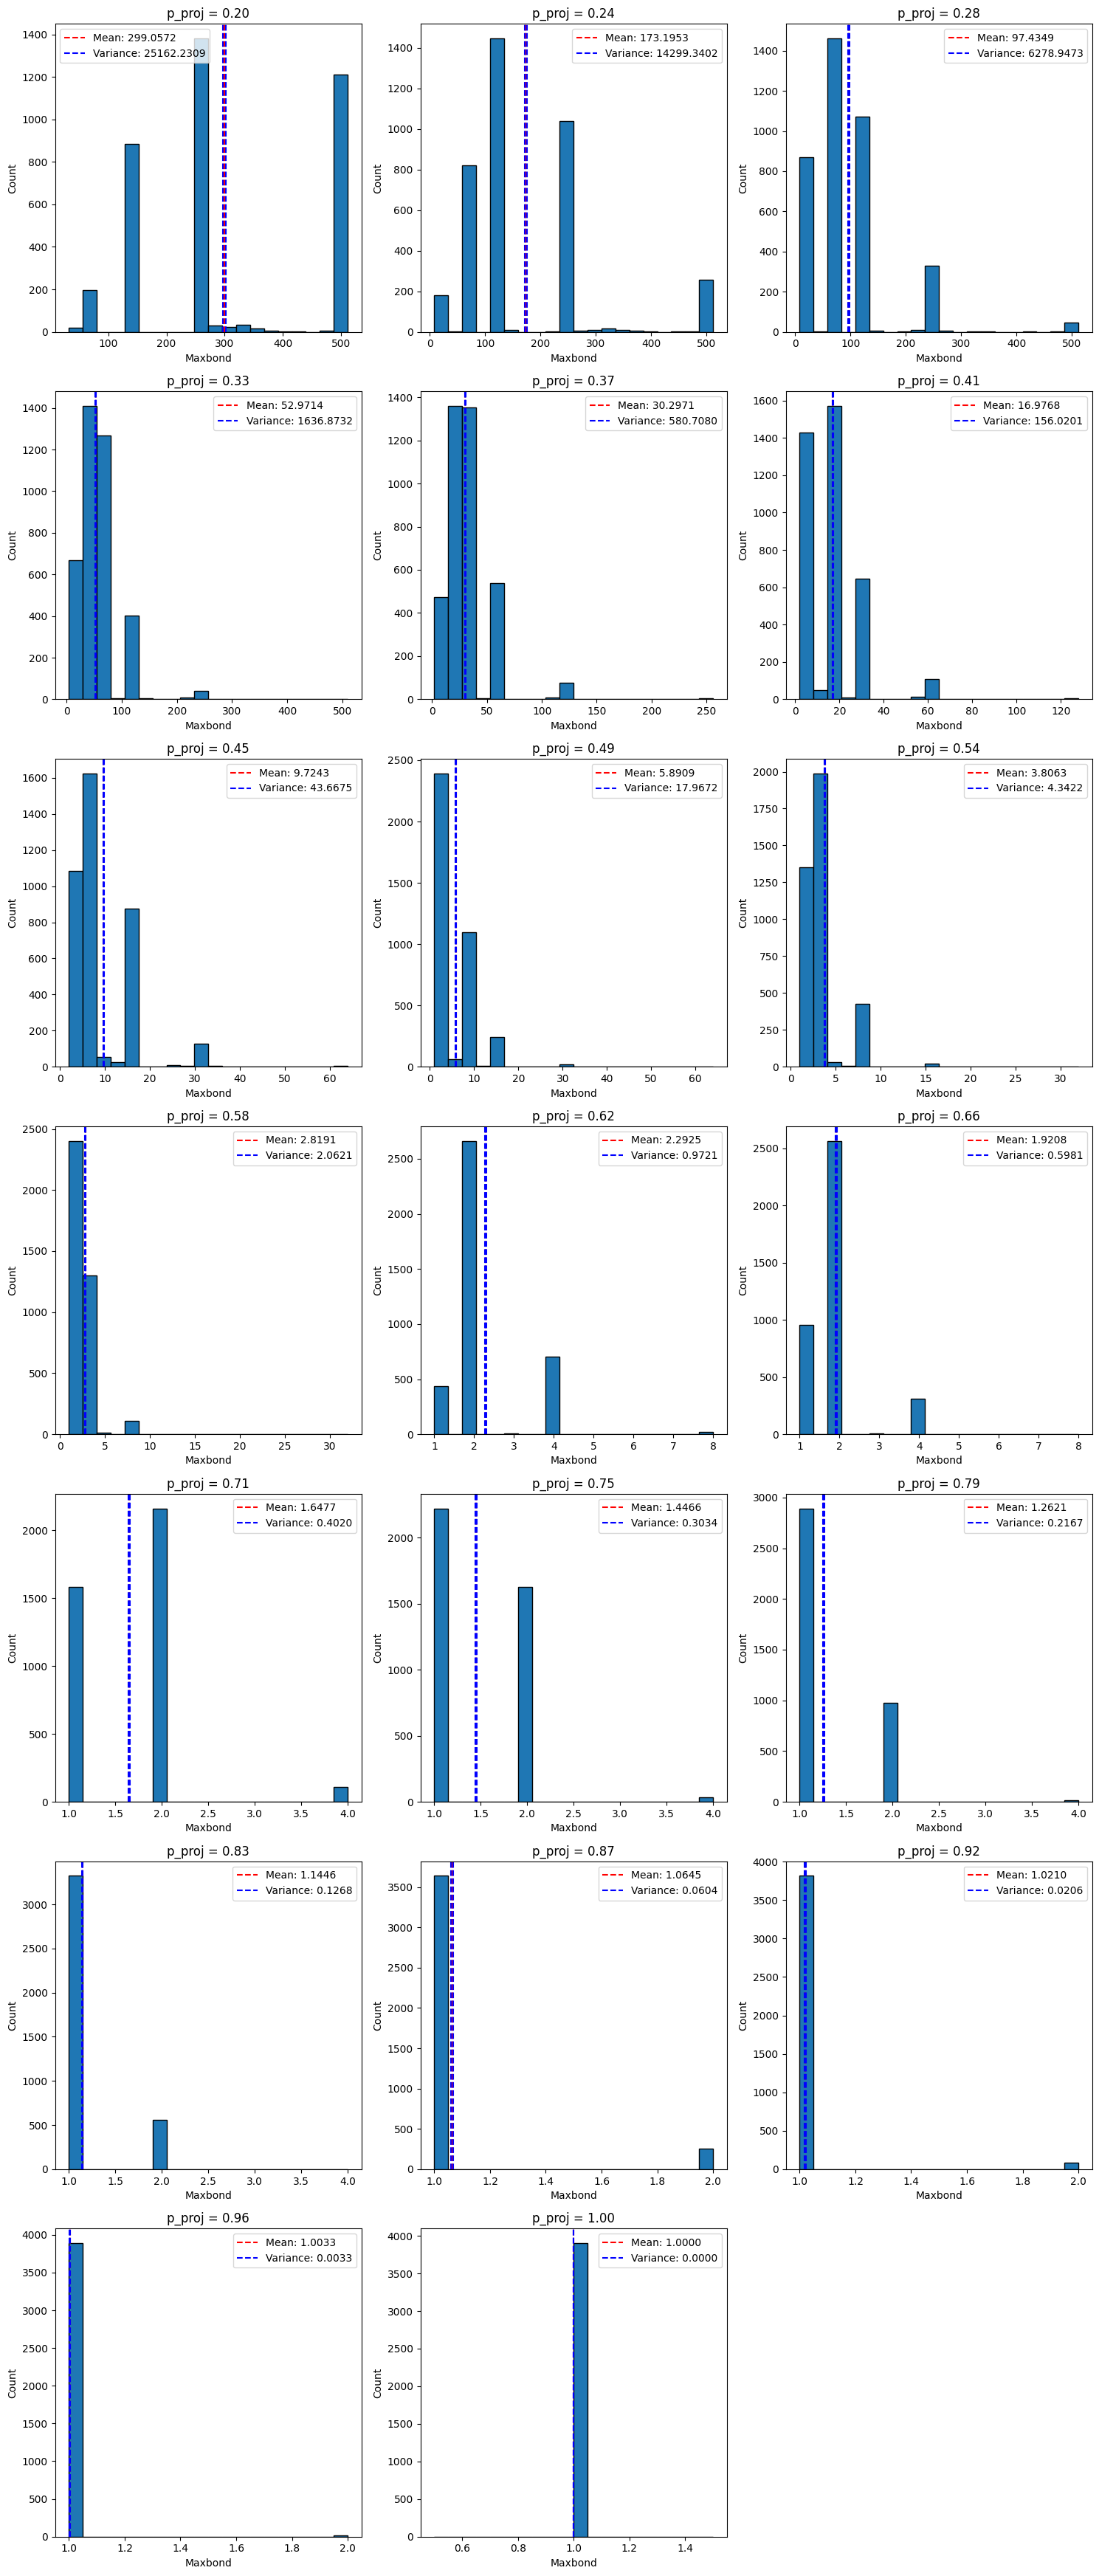

In [12]:
import matplotlib.pyplot as plt
from read_hdf5_func import calculate_variance_and_error, calculate_mean_and_error

# Create a figure with subplots arranged based on number of p_proj values
n_plots = len(dict_maxbond)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plot histogram for each p_proj value
for idx, (p_proj, maxbonds) in enumerate(sorted(dict_maxbond.items())):
    ax = axes[idx]
    mean, sem = calculate_mean_and_error(maxbonds)
    var, semvar = calculate_variance_and_error(maxbonds)
    # print(maxbonds)
    ax.hist(maxbonds, bins=20, edgecolor='black')
    ax.set_title(f'p_proj = {p_proj:.2f}')
    ax.set_xlabel('Maxbond')
    ax.set_ylabel('Count')
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.4f}')
    ax.axvline(mean + sem, color='blue', linestyle='--', label=f'Variance: {var:.4f}')
    ax.axvline(mean - sem, color='blue', linestyle='--')
    ax.legend()

# Remove any empty subplots
for idx in range(len(dict), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()
